# Analyse Gromacs gro files

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Update font size for graphics
plt.rcParams.update({"font.size": 20})

In [2]:
df = pd.read_csv("../data/gromacs_gro_files_info.tsv", sep="\t")
print(df.shape)
df.head()

(9005, 9)


,dataset_origin,dataset_id,atom_number,has_protein,has_nucleic,has_lipid,has_water_ion,has_glucid,filename
0,osf,6fuqs,3468,True,False,False,False,False,Trajectories/4_su.gro
1,osf,6fuqs,3468,True,False,False,False,False,Trajectories/6_su.gro
2,osf,6fuqs,3468,True,False,False,False,False,Trajectories/3_su.gro
3,osf,6fuqs,3468,True,False,False,False,False,Trajectories/8_su.gro
4,osf,6fuqs,3468,True,False,False,False,False,Trajectories/2_su.gro


## System size

count    9.005000e+03
mean     5.827436e+04
std      1.192820e+05
min      2.000000e+00
25%      8.428000e+03
50%      1.839700e+04
75%      6.075400e+04
max      5.184000e+06
Name: atom_number, dtype: float64


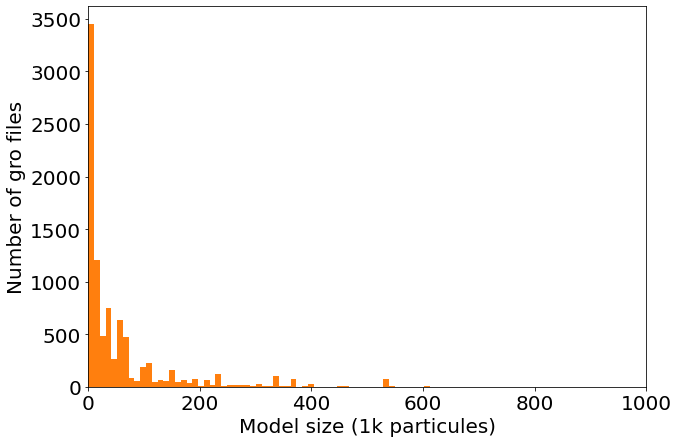

In [57]:
print(df["atom_number"].describe())

df["atom_number_1k"] = df["atom_number"] / 1_000

bins=500

fig, ax = plt.subplots(figsize=(10,7))
ax.hist(df["atom_number_1k"], 
         bins=bins,
         color="tab:orange")
ax.set_xlabel("Model size (1k particules)")
ax.set_ylabel("Number of gro files")
ax.set_xlim(0, 1_000)

plt.savefig("gromacs_gro_size_histogram.png", dpi=300, bbox_inches="tight")
plt.savefig("gromacs_gro_size_histogram.svg", bbox_inches="tight")

In [10]:
df.query("atom_number > 1_000_000")

,dataset_origin,dataset_id,atom_number,has_protein,has_nucleic,has_lipid,has_water_ion,has_glucid,filename
733,zenodo,3756668,1052627,True,False,False,True,False,confEND.gro
2787,zenodo,4034250,1354266,False,False,True,True,False,MONO_550_310K_1521.gro
3050,zenodo,3634884,1113840,True,False,True,False,False,noPIP2_large_finalframe.noW.gro
3051,zenodo,3634884,1158768,True,False,True,False,False,PC_large_finalframe.noW.gro
3052,zenodo,3634884,3522816,True,False,True,True,False,PM_large_lastframe.noW.gro
4769,zenodo,3604139,1113224,True,False,True,True,False,P400-L_start.gro
4881,zenodo,3756664,1055753,True,False,False,True,False,confEND.gro
8015,figshare,1238172,5184000,False,False,False,True,False,water01.gro
8543,figshare,14919822,2621751,True,False,False,True,False,Data_share/SMD_data/SMD_structure_data/OUTPUT/...
8544,figshare,14919822,1452705,True,False,False,True,False,Data_share/SMD_data/SMD_structure_data/OUTPUT/...


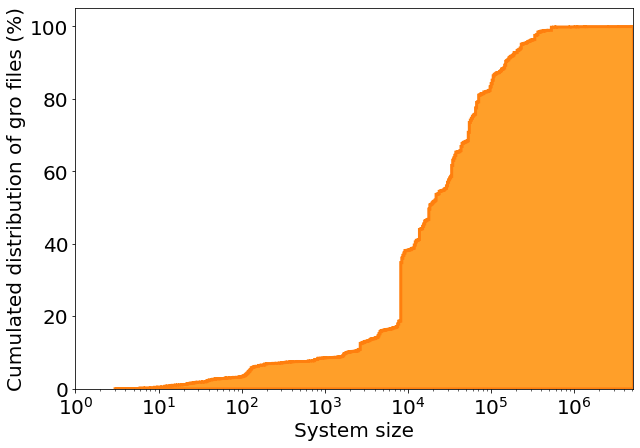

In [56]:
logbins = np.geomspace(df["atom_number"].min()+1, df["atom_number"].max(), 500)

fig, ax = plt.subplots(figsize=(10,7))
values, bins, patches = ax.hist(
    df["atom_number"], 
    bins=logbins,
    color="#FF9F29", edgecolor='tab:orange', linewidth=3,
    histtype="stepfilled", cumulative=True, density=True
)
patches = patches.pop()
ax.set_xlabel("System size")
ax.set_ylabel("Cumulated distribution of gro files (%)")
ax.set_yticks(np.arange(0, 1.1, 0.2), [f"{value:.0f}" for value in np.arange(0, 1.1, 0.2)*100])
ax.set_xscale("log")
ax.set_xlim(1, df["atom_number"].max())


plt.savefig("gromacs_gro_system_size_cumulated.png", dpi=300, bbox_inches="tight")
plt.savefig("gromacs_gro_system_size_cumulated.svg", bbox_inches="tight")